<a href="https://colab.research.google.com/github/hurou2025/shenmyling/blob/main/IBM_homework_shenmyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [2]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(period="max")

# Display the first 5 rows
tesla_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping (1 Point)

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Tesla revenue data extraction
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize Tesla revenue dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the Tesla revenue table
tables = soup.find_all('table')

# Extract Tesla revenue data from the first table
if tables:
    tesla_table = tables[0]  # Tesla is typically the first table
    rows = tesla_table.find_all('tr')

    for row in rows[1:]:  # Skip header row
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Clean revenue data
            revenue = revenue.replace('$', '').replace(',', '').replace(' ', '')

            if revenue and revenue != '':
                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Remove rows with empty revenue
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('', None)
tesla_revenue = tesla_revenue.dropna()

print("Tesla Revenue Data:")
print(tesla_revenue.head())
print(f"Total records: {len(tesla_revenue)}")

Tesla Revenue Data:
   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759
Total records: 13


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [6]:
# Extract GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

# Display the data
print("GameStop Stock Data:")
print(gme_data.head())
print(f"Total records: {len(gme_data)}")

GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Total records: 5894


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [7]:
# GameStop revenue data extraction
# Initialize GameStop revenue dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract GameStop revenue data from the second table
if len(tables) > 1:
    gme_table = tables[1]  # GameStop is typically the second table
    rows = gme_table.find_all('tr')

    for row in rows[1:]:  # Skip header row
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Clean revenue data
            revenue = revenue.replace('$', '').replace(',', '').replace(' ', '')

            if revenue and revenue != '':
                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Remove rows with empty revenue
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('', None)
gme_revenue = gme_revenue.dropna()

print("GameStop Revenue Data:")
print(gme_revenue.head())
print(f"Total records: {len(gme_revenue)}")

GameStop Revenue Data:
         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757
Total records: 53


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

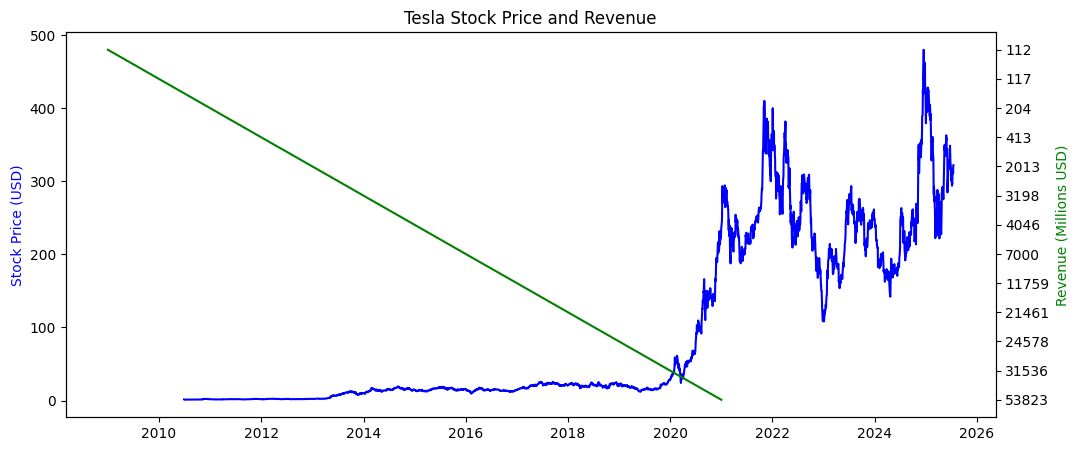

In [9]:
import matplotlib.pyplot as plt

# Plot Tesla stock and revenue
fig, ax1 = plt.subplots(figsize=(12, 5))

# Stock Price
ax1.plot(tesla_history.index, tesla_history["Close"], color='blue')
ax1.set_ylabel('Stock Price (USD)', color='blue')
ax1.set_title('Tesla Stock Price and Revenue')

# Revenue (secondary axis)
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(tesla_revenue["Date"]), tesla_revenue["Revenue"], color='green')
ax2.set_ylabel('Revenue (Millions USD)', color='green')

plt.show()


Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [10]:
# Create GameStop dashboard
print("Creating GameStop Stock and Revenue Dashboard...")
make_graph(gme_data, gme_revenue, "GameStop")

Creating GameStop Stock and Revenue Dashboard...
